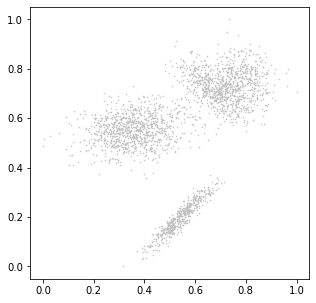

In [ ]:
import numpy as np 
import numpy.matlib 
import matplotlib.pyplot as plt
from matplotlib import colors

# np.random.rand = uniform random generation, [0, 1]
# np.random.randn = normal random generation, N(0, 1)
r1 = 10*(np.random.rand(2,2) - 0.5) # 2x2, -5~5
r2 = 10*(np.random.rand(2,2) - 0.5) 
r3 = 10*(np.random.rand(2,2) - 0.5)
r4 = 10*(np.random.rand(2,2) - 0.5) 

t1 = 50*(np.random.rand(2) - 0.5)  # 2x1, -25~25
t2 = 50*(np.random.rand(2) - 0.5)
t3 = 50*(np.random.rand(2) - 0.5)
t4 = 50*(np.random.rand(2) - 0.5)

X1 = np.random.randn(1000,2)
X1 = X1.dot(r1) + t1

X2 = np.random.randn(500,2)
X2 = X2.dot(r2) + t2

X3 = np.random.randn(500,2)
X3 = X3.dot(r3) + t3

X4 = np.random.randn(500,2)
X4 = X4.dot(r4) + t4

# unlabel data
X = np.vstack((X1, X2, X3, X4))

# normalization, [0, 1]
Xmin = np.min(X, axis = 0)
Xmax = np.max(X, axis = 0)
X = (X - Xmin) / (Xmax - Xmin)

plt.figure(figsize = (5,5))
plt.plot(X[:,0],X[:,1],".",markersize = 1, color = [0.75, 0.75, 0.75])

N,D = X.shape

In [ ]:
# samples ~ point 거리 제곱 계산하는 함수
def computeDistance2(samples, point):
    N,D = samples.shape
    D = point.shape
    dist2 = np.sum( (samples - np.matlib.repmat(point.reshape(1,-1),N,1) )**2 , axis = 1)
    # reshape(1,-1) : 행 1 고정 -> 열은 알아서 정해줌 
    return dist2.reshape(-1)

C:\Users\leh\anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: Mean of empty slice


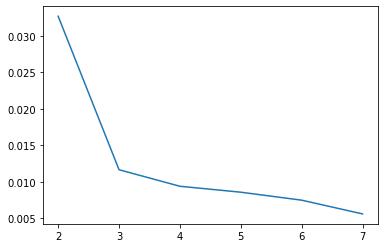

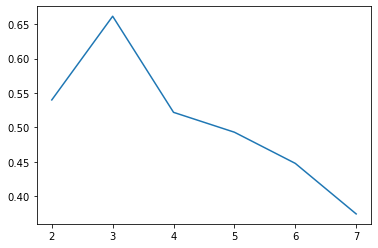

In [ ]:
# inertia 담을 공간
inertia = np.zeros(20)    
inertia[:] = np.nan      # nan : not a number( Null값 비슷한거인듯)

# silhouette coefficients 담을 공간
s_coeff = np.zeros(N)
a = np.zeros(N) # intra-cluster distance
b = np.zeros(N) # nearest-cluster distance

# silhouette score 담을 공간
s_score = np.zeros(20)
s_score[:] = np.nan

for K in range(2, 8):         # cluster 개수(K) 바꿔가면서 clustering 후 inertia, silhouette 구하기
    dist2 = np.zeros((N,K))   # distance 제곱
    dist2[:] = np.nan
    
    # K-means clustering
    
    while (np.sum( np.isnan(dist2) ) > 0):  # 초기화가 잘못돼서 어떤 cluster에는 sample이 하나도 할당이 안되는 경우 방지 
    # isnan : is nan 숫자가 아니면 True 
    # 첫 바퀴는 모두 nan이니까 돌아가고,
    # 계산 후에 dist2에 not number가 하나라도 있으면 mu 초기화부터 다시    
        mu = np.random.rand(D,K)  
        iterMax = 10
        for iter in range(iterMax):
            for k in range(K):            # K개의 클러스터 중 k번째 클러스터에 대해
                dist2[:,k] = computeDistance2(X, mu[:,k])
            label = np.argmin(dist2, axis = 1)  # 거리가 가장 작은 sample의 index
            
            # 평균 mu 업데이트
            for k in range(K):
                mu[:,k] = np.nanmean( X[label == k,:], axis = 0) 
                # nanmean : nan값을 포함하여 평균구하기
                
    # 최소인 cluster가 내 cluster니까 최솟값들 더해서 평균내면 inertia
    inertia[K] = np.mean( np.min(dist2, axis = 1) )  
    
    
    

    
    for n in range(N):
        
        label_intra = label[n]      # n번째 샘플 X[n,:] 이 속한 cluster의 index (intra)
        mask_intra = (label == label_intra)    # 그 index에 해당되는 sample들을 추림
        a[n] = np.mean(np.sqrt(computeDistance2(X[mask_intra,:], X[n,:])))  # 그 샘플들이랑, 나 = X[n,:]와의 거리의 평균
        
        
        dist2_sort = np.sort(dist2[n,:])                          # 가까운 cluster 구하기 위해 정렬
        label_nearest = np.where(dist2[n,:] == dist2_sort[1])[0]  # n번째 샘플 X[n,:]과 제일 가까운 cluster의 index (nearest)
        mask_nearest = (label == label_nearest)                  # 그 index에 해당되는 sample들을 추림
        b[n] = np.mean(np.sqrt(computeDistance2(X[mask_nearest,:], X[n,:])))  # 그 샘플들이랑, 나 = X[n,:]와의 거리의 평균
        
        # s_coeff[n] = (b[n] - a[n]) / max([a[n], b[n]])
        s_coeff[n] = (b[n] - a[n]) / np.max([a[n], b[n]])
        
    s_score[K] = np.nanmean(s_coeff)
    
#     plt.figure(figsize = (5,5))
#     for k in range(0,K):
#         plt.plot(np.sort(s_coeff[label == k]))
#     plt.xlabel('samples')
#     plt.ylabel('silhouette coefficient')

plt.figure()
plt.plot(inertia)
plt.figure()
plt.plot(s_score)